In [17]:
import sys
import os
import numpy as np
import pandas as pd
import shap

sys.path.append(os.path.expanduser('~/Documents/Weave'))
from Weave.utils import collapse_restore_multiindex

In [44]:
shap.initjs()

In [37]:
testpath = '/nobackup_1/users/straaten/shaptest_standard/7/-21/responsagg_separation.parquet'
inputpath = '/nobackup_1/users/straaten/spatcov/precursor.multiagg.parquet'
df = pd.read_parquet(testpath).sort_index(axis = 1)
df_in = pd.read_parquet(inputpath).loc[df.index.get_level_values('time'), (slice(None),slice(None),slice(None),-21,slice(None),'spatcov')].sort_index(axis = 1)
# The ordering of the columns between these two is different. Perhaps because of pd.concat in the cross-validation, which does some matching of the non-concatenation axis

In [46]:
_, names = collapse_restore_multiindex(df, axis = 1, ignore_level=['separation','lag','metric'], inplace = True) # Drop separation because single value

In [50]:
shap.force_plot(base_value = 0.2, shap_values=df.values[:100,:], features=df_in.values[:100,], feature_names=df.columns)

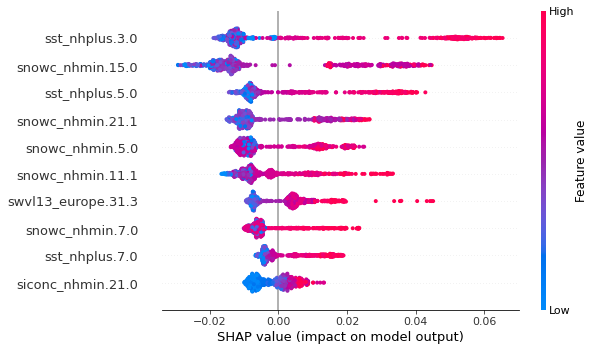

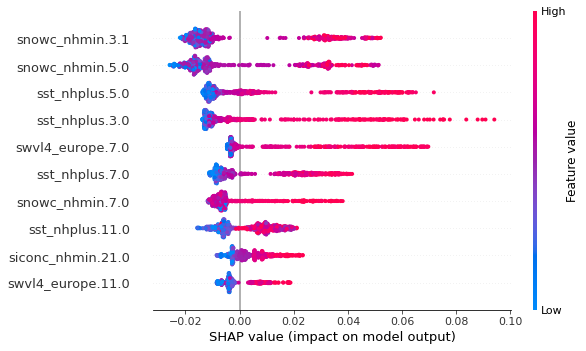

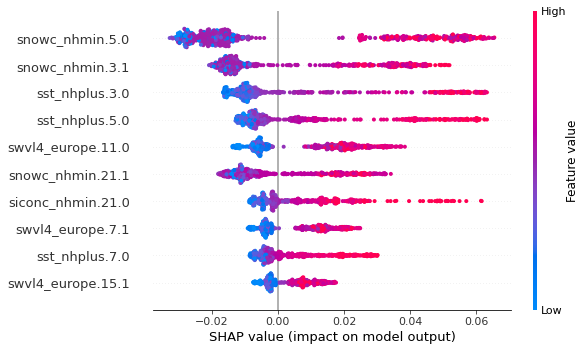

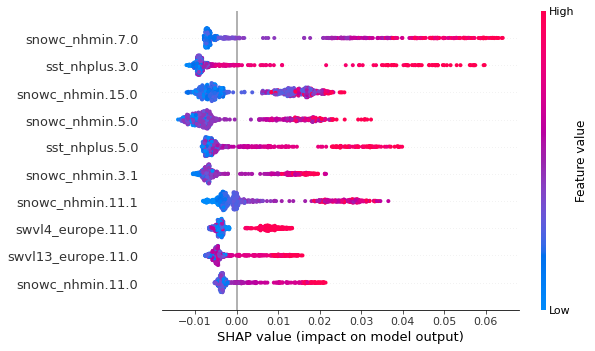

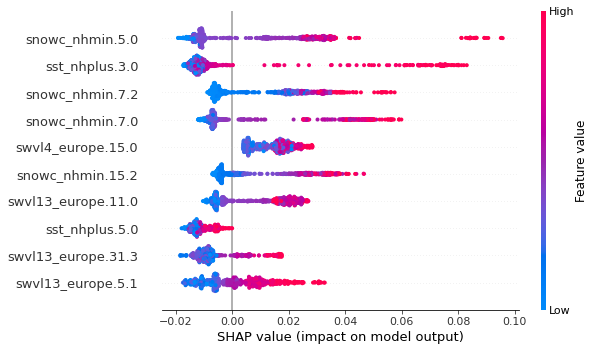

In [55]:
for fold in df.index.get_level_values('fold').unique():
    shapdata = df.loc[(fold,),:]
    pred_vals = df_in.loc[shapdata.index.get_level_values('time'),:]
    shap.summary_plot(shap_values=shapdata.values, features=pred_vals.values, feature_names=shapdata.columns, max_display = 10)

This shows that over the different validation folds the relative ordering differs. Though some pop up in most.

indexing past lexsort depth may impact performance.


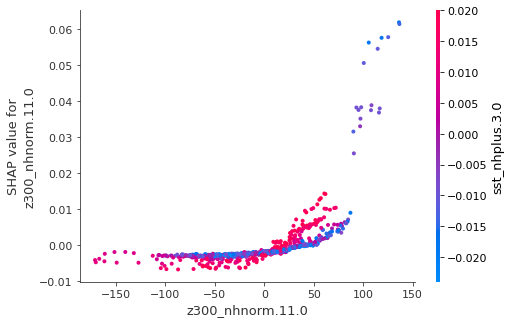

indexing past lexsort depth may impact performance.


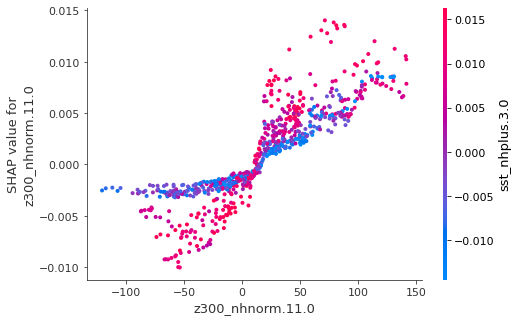

indexing past lexsort depth may impact performance.


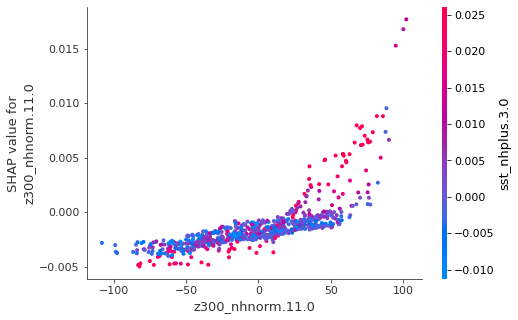

indexing past lexsort depth may impact performance.


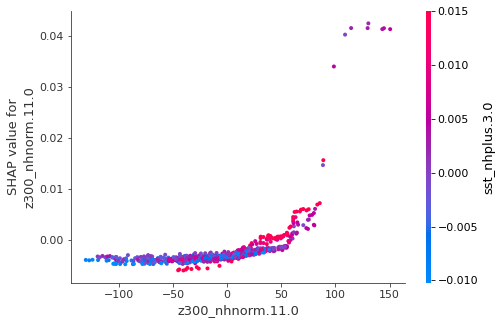

indexing past lexsort depth may impact performance.


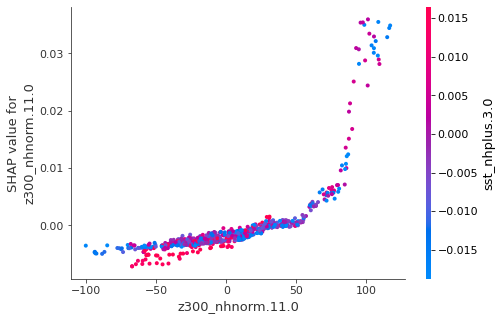

In [72]:
for fold in df.index.get_level_values('fold').unique():
    xvar = 'z300_nhnorm.11.0'
    colvar = 'sst_nhplus.3.0' #yvar is the shap values
    shapdata = df.loc[(fold,),:]
    pred_vals = df_in.loc[shapdata.index.get_level_values('time'),:]
    shap.dependence_plot(ind = xvar, interaction_index= colvar, shap_values=shapdata.values, features=pred_vals.values, feature_names=shapdata.columns)

Z300 influence on the thing is heightened (steeper slope) when the background sst conditions are suitable (red values), then the circulation pattern becomes decisive on whether probability is heightened or lowered.

In [67]:
df.columns

Index(['siconc_nhmin.11.0', 'siconc_nhmin.11.1', 'siconc_nhmin.15.0',
       'siconc_nhmin.15.1', 'siconc_nhmin.21.0', 'siconc_nhmin.21.1',
       'siconc_nhmin.31.0', 'siconc_nhmin.31.1', 'siconc_nhmin.31.2',
       'snowc_nhmin.3.0',
       ...
       'transp_europe.31.0', 'transp_europe.31.1', 'z300_nhnorm.1.0',
       'z300_nhnorm.3.0', 'z300_nhnorm.5.0', 'z300_nhnorm.7.0',
       'z300_nhnorm.11.0', 'z300_nhnorm.15.0', 'z300_nhnorm.21.0',
       'z300_nhnorm.31.0'],
      dtype='object', name='collapsed', length=113)